In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
import sys
sys.path.append("..")
import grading
grader = grading.Grader(assignment_key="UaHtvpEFEee0XQ6wjK-hZg", 
                      all_parts=["xU7U4", "HyTF6", "uNidL", "ToK7N", "GBdgZ", "dLdHG"])

In [140]:
# token expires every 30 min
COURSERA_TOKEN = 'INTZoUISfKapVAVR' ### YOUR TOKEN HERE
COURSERA_EMAIL = 'idin.consulting@gmail.com' ### YOUR EMAIL HERE

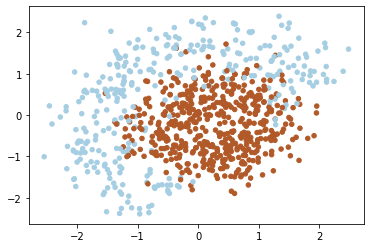

In [84]:
with open('train.npy', 'rb') as train:
    X = np.load(train)

with open('target.npy', 'rb') as target:
    y = np.load(target)

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()

In [85]:
print("Feature matrix size: ", X.shape)
print("Target size: ", y.shape)

Feature matrix size:  (826, 2)
Target size:  (826,)


In [86]:
def expand(X):
    '''Adds quadratic features.
    
    For each sample(row in matrix), computes an extended row:
    [f0,f1,f0^2,f1^2,f0*f1,1]

    Args:
    X (np.array): matrix of features in a form of a numpy list. [n_samples,2]

    Returens:
    X (np.array): expanded features in the form of a numpy list. [n_samples, 6]
    '''

    X_expanded = np.zeros((X.shape[0],6))

    X_expanded[:,0] = X[:,0]
    X_expanded[:,1] = X[:,1]
    X_expanded[:,2] = X[:,0] ** 2
    X_expanded[:,3] = X[:,1] ** 2
    X_expanded[:,4] = X[:,0] * X[:,1]
    X_expanded[:,5] = 1

    return X_expanded

In [87]:
X_expanded = expand(X)

In [88]:
# simple test on random numbers

dummy_X = np.array([
        [0,0],
        [1,0],
        [2.61,-1.28],
        [-0.59,2.1]
    ])

# call your expand function
dummy_expanded = expand(dummy_X)

# what it should have returned:   x0       x1       x0^2     x1^2     x0*x1    1
dummy_expanded_ans = np.array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

#tests
assert isinstance(dummy_expanded,np.ndarray), "please make sure you return numpy array"
assert dummy_expanded.shape == dummy_expanded_ans.shape, "please make sure your shape is correct"
assert np.allclose(dummy_expanded,dummy_expanded_ans,1e-3), "Something's out of order with features"

print("Seems legit!")

Seems legit!


## Logistic regression

To classify objects we will obtain probability of object belongs to class '1'. To predict probability we will use output of linear model and logistic function:

$$ a(x; w) = \langle w, x \rangle $$
$$ P( y=1 \; \big| \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$


In [89]:
def probability(X, w):
    ''' Given input features and weights return predicted probabilities of y==1 given x, P(y=1|x)

    Args:
        X (np.ndarray): feature matrix X (use X_expanded if necessary); [n_samples, 6]
        w (np.ndarray): wight vector w for each of the expanded features; [6,1]
    
    Returns:
        sig (np.ndarray): an array of predicted probabilities in [0,1] interval.
    '''

    a = X.dot(w)
    sig = 1/(1+np.exp(-1*a))
    return sig

In [90]:
dummy_weights = np.linspace(-1, 1, 6)
ans_part1 = probability(X_expanded[:1, :], dummy_weights)[0]
print("Positive class probability for the first example: {:.2f}".format(ans_part1))

Positive class probability for the first example: 0.38


In [101]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("xU7U4", ans_part1)

In [102]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


In logistic regression the optimal parameters $w$ are found by cross-entropy minimization:

Loss for one sample: $$ l(x_i, y_i, w) = - \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1\, | \, x_i,w))}\right] $$

Loss for many samples: $$ L(X, \vec{y}, w) =  {1 \over \ell} \sum_{i=1}^\ell l(x_i, y_i, w) $$



In [91]:
def compute_loss(X, y, w):
    ''' Given the dataset computes the binary cross-entropy loss function
    
    Args:
        X (np.ndarray): feature matrix X (use X_expanded if necessary); [n_samples, 6]
        w (np.ndarray): wight vector w for each of the expanded features; [6,1]
        y (np.ndarray): target values for each sample; [n_sample, 1]
    
    Returns:
        L (float): Loss value for provided w parameters
    
    '''
    sig = probability(X,w)
    L = (1/X.shape[0]) * sum(-1 * (y * np.log(sig)+(1-y) * np.log(1-sig)))
    
    return L

In [92]:
# use output of this cell to fill answer field 
ans_part2 = compute_loss(X_expanded, y, dummy_weights)
print("Loss value for the current dummy_weights: ", ans_part2)

Loss value for the current dummy_weights:  1.0185634030782509


In [103]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("HyTF6", ans_part2)

In [104]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Since we train our model with gradient descent, we should compute gradients.

To be specific, we need a derivative of loss function over each weight [6 of them].

$$ \nabla_w L = {1 \over \ell} \sum_{i=1}^\ell \nabla_w l(x_i, y_i, w) $$ 

We won't be giving you the exact formula this time — instead, try figuring out a derivative with pen and paper. 

As usual, we've made a small test for you, but if you need more, feel free to check your math against finite differences (estimate how $L$ changes if you shift $w$ by $10^{-5}$ or so).

------------------------------------------------------------------
<font color='blue'> Gradient of the binary cross-entropy loss function can be calculated base on the following formula:</font>
<font color='red'>

$$ \frac{\partial L(w)}{\partial w} = \frac{1}{l} X^T [P(Xw) - y] $$
</font>

<font color='blue'> 

**Sources:**
+ [The Derivative of Cost Function for Logistic Regression](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)
+ [Logistic Regression - Stanford Homework handout](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/pdfs/40%20LogisticRegression.pdf)
</font>

In [93]:
def compute_grad(X, y, w):
    ''' Given the dataset computes derivative vector [6] of L over each weights.

    Args:
        X (np.ndarray): feature matrix X (use X_expanded if necessary); [n_samples, 6]
        w (np.ndarray): wight vector w for each of the expanded features; [6,1]
        y (np.ndarray): target values for each sample; [n_sample, 1]
    
    Returns:
        w_grad (np.ndarray): derivative vector [6] of L over each weights: [6,1]
    '''

    w_grad = 1/X.shape[0] * np.transpose(X).dot(probability(X, w) - y)
    print("derivative vector of loss function: \n", w_grad)
    return w_grad

In [94]:
# use output of this cell to fill answer field 
ans_part3 = np.linalg.norm(compute_grad(X_expanded, y, dummy_weights))
print("Normalized gradient components of wieght matrix: ", ans_part3)

derivative vector of loss function: 
 [-0.32741296  0.05429288  0.31961242  0.38946883  0.2029897   0.06801579]
Normalized gradient components of wieght matrix:  0.6401687302118625


In [105]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("uNidL", ans_part3)

In [106]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Here's an auxiliary function that visualizes the predictions:

In [95]:
from IPython import display

h = 0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    ''' Draw classifier prediction
    Args:
        X (np.ndarray): feature matrix X (use X_expanded if necessary); [n_samples, 6]
        w (np.ndarray): wight vector w for each of the expanded features; [6,1]
        y (np.ndarray): target values for each sample; [n_sample, 1]
        history:

    Returns:
        matplotlib figure
    '''
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots(1,2)
    ax[0].contourf(xx, yy, Z, alpha=0.8)
    ax[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
    ax[0].set_xlabel("x1", size=16)
    ax[0].set_ylabel("x2", size=16)

    ax[1].plot(history)
    ax[1].grid()
    ax[1].set_xlabel("# of iteration", size=16)
    ax[1].set_ylabel("Loss", size=16)
    ymin, ymax = ax[1].set_ylim()
    ax[1].set_ylim(0, ymax)

    
    display.clear_output(wait=False)
    plt.tight_layout()
    plt.show()

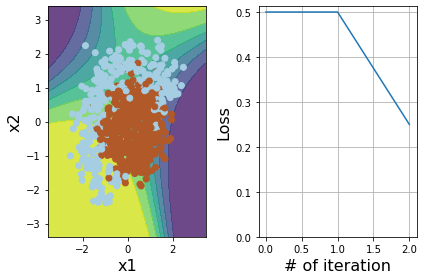

In [96]:
visualize(X, y, dummy_weights, [0.5, 0.5, 0.25])

## Training
In this section we'll use the functions you wrote to train our classifier using stochastic gradient descent.

You can try change hyperparameters like batch size, learning rate and so on to find the best one, but use our hyperparameters when fill answers.

## Mini-batch SGD

Stochastic gradient descent just takes a random batch of $m$ samples on each iteration, calculates a gradient of the loss on it and makes a step:
$$ w_t = w_{t-1} - \eta \dfrac{1}{m} \sum_{j=1}^m \nabla_w l(x_{i_j}, y_{i_j}, w_t) $$



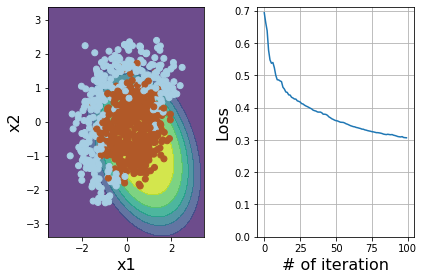

<Figure size 432x288 with 0 Axes>

In [97]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.1

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind,:], y[ind], w, loss)

    w = w - eta * compute_grad(X_expanded[ind,:], y[ind], w)
    
visualize(X, y, w, loss)
plt.clf()

In [98]:
# use output of this cell to fill answer field 

ans_part4 = compute_loss(X_expanded, y, w)

In [99]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("ToK7N", ans_part4)

In [100]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## SGD with momentum

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations as can be seen in image below. It does this by adding a fraction $\alpha$ of the update vector of the past time step to the current update vector.
<br>
<br>

$$ \nu_t = \alpha \nu_{t-1} + \eta\dfrac{1}{m} \sum_{j=1}^m \nabla_w l(x_{i_j}, y_{i_j}, w_t) $$
$$ w_t = w_{t-1} - \nu_t$$

<br>


![](sgd.png)


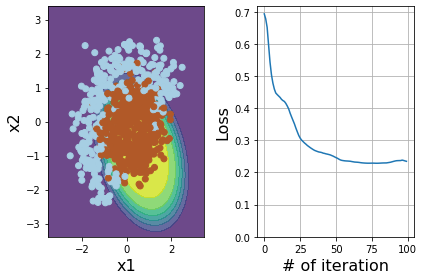

<Figure size 432x288 with 0 Axes>

In [109]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.05      # learning rate
alpha = 0.9     # momentum
nu = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    nu = alpha * nu + eta * compute_grad(X_expanded[ind, :], y[ind], w)
    w = w - nu
    
visualize(X_expanded, y, w, loss)
plt.clf()    


In [111]:
# use output of this cell to fill answer field 

ans_part5 = compute_loss(X_expanded, y, w)


In [112]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("GBdgZ", ans_part5)

In [114]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## RMSprop

Implement RMSPROP algorithm, which use squared gradients to adjust learning rate:

$$ G_j^t = \alpha G_j^{t-1} + (1 - \alpha) g_{tj}^2 $$
$$ w_j^t = w_j^{t-1} - \dfrac{\eta}{\sqrt{G_j^t + \varepsilon}} g_{tj} $$

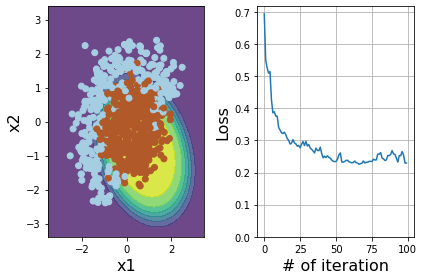

<Figure size 432x288 with 0 Axes>

In [142]:
np.random.seed(42)

w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.1      # learning rate
alpha = 0.9     # momentum
g2 = np.zeros_like(w)
eps = 1e-8

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y , w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    g2 = alpha * g2 + (1-alpha) * np.square(compute_grad(X_expanded[ind, :], y[ind], w))
    w = w - eta / np.sqrt(g2 + eps) * compute_grad(X_expanded[ind, :], y[ind], w)

visualize(X, y, w, loss)
plt.clf()

In [143]:
# use output of this cell to fill answer field 
ans_part6 = compute_loss(X_expanded, y, w)

In [144]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("dLdHG", ans_part6)

In [145]:
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!
